In [44]:
import cv2
import matplotlib.pyplot as plt

In [45]:
img = cv2.imread('sudoku1.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [46]:
img_blurred = cv2.GaussianBlur(img_gray,(7,7),3)

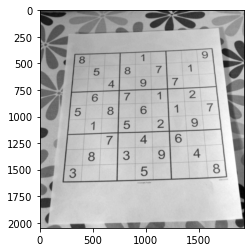

In [47]:
plt.imshow(img_blurred,cmap='gray')

In [48]:
thresh = cv2.adaptiveThreshold(img_blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

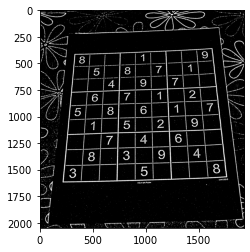

In [49]:
plt.imshow(thresh,cmap='gray')

In [50]:
# thresh = cv2.bitwise_not(thresh)
# plt.imshow(thresh,cmap='gray')

In [51]:
contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contours =  contours[0]
# countours

In [52]:
contours = sorted(contours,key=cv2.contourArea,reverse=True)

In [65]:
sodoku_contour = None

for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour,True)
    approx = cv2.approxPolyDP(contour,epsilon,True)
    if len(approx) == 4:
        sodoku_contour = approx
        break

In [66]:
sodoku_contour

array([[[1616,  359]],

       [[ 326,  413]],

       [[ 212, 1617]],

       [[1754, 1570]]], dtype=int32)

In [67]:
# result = cv2.drawContours(img,[sodoku_contour],-1,(0,255,0),4)
x,y,w,h = cv2.boundingRect(sodoku_contour)
result = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

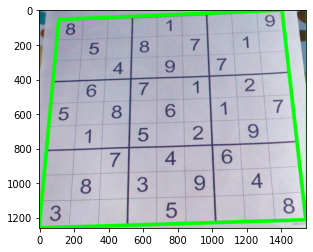

In [69]:
plt.imshow(result[y:y+h,x:x+w])